### Introdução

Analisar dados do processos de contratação setor de Purchasing
e retirar insights significativos como cada setor se saiu no
projetos designados. 

# Dicionario da colunas

• Código do Projeto - O código de cada projeto existente

• Área - Setor de cada projeto

• Data de Publicação ao Mercado - É a data de publicação no mercado

• Data de Avaliação Técnica - A data que ocorrar a avalição tecnica

• Data de Avaliação Comercial - A data da Avaliação comercial

• Data de Premiação - A data da premiação

• Data de Assinatura de Contrato - A data a assinatura de contrato

• Budget - Valor do orçamento para o projeto

• Valor Fechado - O Valor do total final do custo do projeto

• Saving - O Valor economizado em cada projeto

# Desafio### 1. Pré - Processamento dos dados
Itens Obrigatórios

1. Gerar insights relevantes a partir da base de dados fornecida, respondendo às seguintes
perguntas:
o Quais são as áreas com maior eficiência em termos de tempo de contratação
(tempo entre a publicação ao mercado e a assinatura do contrato)?
o Qual é a média de saving obtido por projeto?
o Existem padrões ou tendências nos dados (ex.: sazonalidade nas contratações,
áreas com maior saving)?

2. Demonstrar como construiu: Trazer o passo a passo de como foi feita a construção do
projeto desde o carregamento da base até o resultado final

Itens Opcionais
3. Avaliar a eficiência dos processos de contratação com base nos dados e identificar
possíveis gargalos ou áreas de melhoria.
4. Sugerir melhorias ou ações que possam otimizar o processo de contratação, baseando-se
nos insights obtidos



### 1. Pré - Processamento dos dados

In [36]:
# importando das bibliotecas 
import pandas as pd # pandas para manipulação do dataframe
import matplotlib.pyplot as plt  # Bibli pra plotar graficos
# Configurando a formatação local para usar a vírgula como separador de milhar
import locale
locale.setlocale(locale.LC_ALL, '')
from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as ticker



Para iniciar o projeto foi necessário abrir o arquivo no excel e salva-lo em CSV 
logo em seguida import e transforma-lo em um dataframe utilizando a biblioteca do 
pandas e exibir as primeiras 5 linhas utilizando o .head()

In [37]:
#Importando o dataset

df_base = pd.read_csv('./base_dados_purchasing.csv', sep=';')

df_base.head(5)

,Código do Projeto,Área,Data de Publicação ao Mercado,Data de Avaliação Técnica,Data de Avaliação Comercial,Data de Premiação,Data de Assinatura de Contrato,Budget (R$),Valor Fechado (R$),Saving (R$)
0,PROJ_001,Operações,2023-09-28 00:00:00,2023-10-11 00:00:00,2023-10-17 00:00:00,2023-10-26 00:00:00,2023-11-02 00:00:00,319000,302698,16302
1,PROJ_002,Vendas,2023-02-23 00:00:00,2023-03-18 00:00:00,2023-03-31 00:00:00,2023-04-05 00:00:00,2023-04-10 00:00:00,369000,349984,19016
2,PROJ_003,Financeiro,2023-04-11 00:00:00,2023-04-24 00:00:00,2023-05-08 00:00:00,2023-05-22 00:00:00,2023-05-23 00:00:00,731000,662422,68578
3,PROJ_004,Operações,2023-09-21 00:00:00,2023-10-19 00:00:00,2023-10-25 00:00:00,2023-11-01 00:00:00,2023-11-07 00:00:00,947000,892694,54306
4,PROJ_005,Marketing,2023-02-22 00:00:00,2023-03-12 00:00:00,2023-03-21 00:00:00,2023-03-31 00:00:00,2023-04-05 00:00:00,499000,463269,35731


Abaixo utilizo .tail() para exibir as ultimas 5 linhas

In [38]:
#Verificando as ultimas 5 linhas 

df_base.tail()

,Código do Projeto,Área,Data de Publicação ao Mercado,Data de Avaliação Técnica,Data de Avaliação Comercial,Data de Premiação,Data de Assinatura de Contrato,Budget (R$),Valor Fechado (R$),Saving (R$)
495,PROJ_496,RH,2023-01-15 00:00:00,2023-02-10 00:00:00,2023-03-01 00:00:00,2023-03-04 00:00:00,2023-03-09 00:00:00,951000,714235,236765
496,PROJ_497,TI,2023-07-11 00:00:00,2023-07-28 00:00:00,2023-08-12 00:00:00,2023-08-17 00:00:00,2023-08-25 00:00:00,923000,745465,177535
497,PROJ_498,Vendas,2023-04-29 00:00:00,2023-05-22 00:00:00,2023-06-09 00:00:00,2023-06-23 00:00:00,2023-06-29 00:00:00,788000,593971,194029
498,PROJ_499,Compras,2023-01-28 00:00:00,2023-02-16 00:00:00,2023-02-22 00:00:00,2023-02-26 00:00:00,2023-03-05 00:00:00,752000,628741,123259
499,PROJ_500,RH,2023-07-21 00:00:00,2023-08-07 00:00:00,2023-08-15 00:00:00,2023-08-18 00:00:00,2023-08-21 00:00:00,800000,718473,81527


Com a base de dados transformada em dataframe irei verificar
se existem missing na base de dados, se existir, irei realizar
o pré processamento.

In [39]:
#Verificando a existência de missing

df_base.isnull().sum()

Código do Projeto                 0
Área                              0
Data de Publicação ao Mercado     0
Data de Avaliação Técnica         0
Data de Avaliação Comercial       0
Data de Premiação                 0
Data de Assinatura de Contrato    0
Budget (R$)                       0
Valor Fechado (R$)                0
Saving (R$)                       0
dtype: int64

Como não existem missing, irei realizar algumas transformações
no dataset para ter uma melhor analise em cima dos dados.
A primeira modificação será padronizar o nome das colunas
retirando os espaços e modificando para letras maíusculas

Utilizarei o inplace=True no final do codigo para impletar a transformação dentro do dataframe
sem ter a necessidade de instanciar um novo.

In [40]:
#Modificando o nome das colunas para uma melhor visualização

df_base.rename(columns={'Código do Projeto':'CODIGO_DO_PROJETO',
                       'Área':'AREA',
                       'Data de Publicação ao Mercado':'DATA_PUBLICACAO_AO_MERCADO',
                       'Data de Avaliação Técnica':'DATA_DE_AVALIACAO_TECNICA',
                       'Data de Avaliação Comercial':'DATA_AVALIACAO_COMERCIAL',
                       'Data de Premiação':'DATA_PREMIACAO',
                       'Data de Assinatura de Contrato':'DATA_ASSINATURA_DE_CONTRATO',
                       'Budget (R$)':'BUDGET',
                       'Valor Fechado (R$)':'VALOR_FECHADO',
                       'Saving (R$)':'SAVING'}, inplace=True)

#Exibindo a transformação

df_base.head()

,CODIGO_DO_PROJETO,AREA,DATA_PUBLICACAO_AO_MERCADO,DATA_DE_AVALIACAO_TECNICA,DATA_AVALIACAO_COMERCIAL,DATA_PREMIACAO,DATA_ASSINATURA_DE_CONTRATO,BUDGET,VALOR_FECHADO,SAVING
0,PROJ_001,Operações,2023-09-28 00:00:00,2023-10-11 00:00:00,2023-10-17 00:00:00,2023-10-26 00:00:00,2023-11-02 00:00:00,319000,302698,16302
1,PROJ_002,Vendas,2023-02-23 00:00:00,2023-03-18 00:00:00,2023-03-31 00:00:00,2023-04-05 00:00:00,2023-04-10 00:00:00,369000,349984,19016
2,PROJ_003,Financeiro,2023-04-11 00:00:00,2023-04-24 00:00:00,2023-05-08 00:00:00,2023-05-22 00:00:00,2023-05-23 00:00:00,731000,662422,68578
3,PROJ_004,Operações,2023-09-21 00:00:00,2023-10-19 00:00:00,2023-10-25 00:00:00,2023-11-01 00:00:00,2023-11-07 00:00:00,947000,892694,54306
4,PROJ_005,Marketing,2023-02-22 00:00:00,2023-03-12 00:00:00,2023-03-21 00:00:00,2023-03-31 00:00:00,2023-04-05 00:00:00,499000,463269,35731


Após modificar o nome dos atributos, irei verificar o tipo
de cada coluna e fazer a transformação adequada.

In [41]:
#Verificando o tipo de cada coluna para modificar para o padrão ideial
df_base.dtypes

CODIGO_DO_PROJETO              object
AREA                           object
DATA_PUBLICACAO_AO_MERCADO     object
DATA_DE_AVALIACAO_TECNICA      object
DATA_AVALIACAO_COMERCIAL       object
DATA_PREMIACAO                 object
DATA_ASSINATURA_DE_CONTRATO    object
BUDGET                          int64
VALOR_FECHADO                   int64
SAVING                          int64
dtype: object

As colunas 'CODIGO_DO_PROJETO' e'AREA' estão como string e não precisará modificar o tipo
, pois são apenas texto. Irei apenas padronizar os texto para que todas as linhas sejam maíusculas.

As colunas 'DATA_PUBLICACAO_AO_MERCADO', 'DATA_DE_AVALIACAO_TECNICA', 'DATA_AVALIACAO_COMERCIAL', 'DATA_PREMIACAO',
'DATA_ASSINATURA_DE_CONTRATO' estão como objetc ('string') e irei transformar para o tipo date, dessa forma será possível fazer calculo com as data e também retirar o horario que estão todos zerado 00:00:00 e utilizar somente as datas.

As colunas 'VALOR_FECHADO','SAVING' e 'BUDGET' estão como INTEGER e não terá necessidade de alterar
pois se tratar de valores inteiro, valores em reais(R$).


In [42]:
#Padronizando as colunas 'CODIGO_DO_PROJETO' e 'AREA' para que elas esteja no padrão upper,
#onde todas as letras esteja em maiuscula e também utilizei o .str para informar que se trata de uma coluna
#do tipo string

#colunas 'CODIGO_DO_PROJETO'
df_base['CODIGO_DO_PROJETO'] = df_base['CODIGO_DO_PROJETO'].str.upper()

#Coluna 'AREA'
df_base['AREA'] = df_base['AREA'].str.upper()

# Exibindo somente as duas colunas transformadas 
df_base[['AREA','CODIGO_DO_PROJETO']].head()



,AREA,CODIGO_DO_PROJETO
0,OPERAÇÕES,PROJ_001
1,VENDAS,PROJ_002
2,FINANCEIRO,PROJ_003
3,OPERAÇÕES,PROJ_004
4,MARKETING,PROJ_005


In [43]:
#Verificando se todas as distruibições foram modificas 
df_base['AREA'].unique()

array(['OPERAÇÕES', 'VENDAS', 'FINANCEIRO', 'MARKETING', 'COMPRAS', 'RH',
       'TI'], dtype=object)

In [44]:
#Verificando se todas as distruibições foram modificas 
df_base['CODIGO_DO_PROJETO'].unique()

array(['PROJ_001', 'PROJ_002', 'PROJ_003', 'PROJ_004', 'PROJ_005',
       'PROJ_006', 'PROJ_007', 'PROJ_008', 'PROJ_009', 'PROJ_010',
       'PROJ_011', 'PROJ_012', 'PROJ_013', 'PROJ_014', 'PROJ_015',
       'PROJ_016', 'PROJ_017', 'PROJ_018', 'PROJ_019', 'PROJ_020',
       'PROJ_021', 'PROJ_022', 'PROJ_023', 'PROJ_024', 'PROJ_025',
       'PROJ_026', 'PROJ_027', 'PROJ_028', 'PROJ_029', 'PROJ_030',
       'PROJ_031', 'PROJ_032', 'PROJ_033', 'PROJ_034', 'PROJ_035',
       'PROJ_036', 'PROJ_037', 'PROJ_038', 'PROJ_039', 'PROJ_040',
       'PROJ_041', 'PROJ_042', 'PROJ_043', 'PROJ_044', 'PROJ_045',
       'PROJ_046', 'PROJ_047', 'PROJ_048', 'PROJ_049', 'PROJ_050',
       'PROJ_051', 'PROJ_052', 'PROJ_053', 'PROJ_054', 'PROJ_055',
       'PROJ_056', 'PROJ_057', 'PROJ_058', 'PROJ_059', 'PROJ_060',
       'PROJ_061', 'PROJ_062', 'PROJ_063', 'PROJ_064', 'PROJ_065',
       'PROJ_066', 'PROJ_067', 'PROJ_068', 'PROJ_069', 'PROJ_070',
       'PROJ_071', 'PROJ_072', 'PROJ_073', 'PROJ_074', 'PROJ_0

In [45]:
#Transformando as colunas que possuem data no formato datetime

df_base['DATA_ASSINATURA_DE_CONTRATO'] = pd.to_datetime(df_base['DATA_ASSINATURA_DE_CONTRATO'])

df_base['DATA_PREMIACAO'] = pd.to_datetime(df_base['DATA_PREMIACAO'])

df_base['DATA_AVALIACAO_COMERCIAL'] = pd.to_datetime(df_base['DATA_AVALIACAO_COMERCIAL'])

df_base['DATA_DE_AVALIACAO_TECNICA'] = pd.to_datetime(df_base['DATA_DE_AVALIACAO_TECNICA'])

df_base['DATA_PUBLICACAO_AO_MERCADO'] = pd.to_datetime(df_base['DATA_PUBLICACAO_AO_MERCADO'])

#Exibindo o tipo de cada atributo
df_base.dtypes


CODIGO_DO_PROJETO                      object
AREA                                   object
DATA_PUBLICACAO_AO_MERCADO     datetime64[ns]
DATA_DE_AVALIACAO_TECNICA      datetime64[ns]
DATA_AVALIACAO_COMERCIAL       datetime64[ns]
DATA_PREMIACAO                 datetime64[ns]
DATA_ASSINATURA_DE_CONTRATO    datetime64[ns]
BUDGET                                  int64
VALOR_FECHADO                           int64
SAVING                                  int64
dtype: object

In [46]:
#exibindo o dataframe inteiro 

df_base.head()

,CODIGO_DO_PROJETO,AREA,DATA_PUBLICACAO_AO_MERCADO,DATA_DE_AVALIACAO_TECNICA,DATA_AVALIACAO_COMERCIAL,DATA_PREMIACAO,DATA_ASSINATURA_DE_CONTRATO,BUDGET,VALOR_FECHADO,SAVING
0,PROJ_001,OPERAÇÕES,2023-09-28,2023-10-11,2023-10-17,2023-10-26,2023-11-02,319000,302698,16302
1,PROJ_002,VENDAS,2023-02-23,2023-03-18,2023-03-31,2023-04-05,2023-04-10,369000,349984,19016
2,PROJ_003,FINANCEIRO,2023-04-11,2023-04-24,2023-05-08,2023-05-22,2023-05-23,731000,662422,68578
3,PROJ_004,OPERAÇÕES,2023-09-21,2023-10-19,2023-10-25,2023-11-01,2023-11-07,947000,892694,54306
4,PROJ_005,MARKETING,2023-02-22,2023-03-12,2023-03-21,2023-03-31,2023-04-05,499000,463269,35731


Após realizar o pré-processamento no dataset e tendo um dataframe
totalmente adequado para analise exploratória, irei
retirar alguns insights para otimizar o desempenho nos projetos realizado.

### 2. Analise exploratória

### 2.1 Pergunta 
1 - Quais são as áreas com maior eficiência em termos de tempo de contratação
(tempo entre a publicação ao mercado e a assinatura do contrato)?

Para responder essa pergunta irei fazer o calculo entre as colunas 'DATA_ASSINATURA_DE_CONTRATO' e a 'DATA_PUBLICACAO_AO_MERCADO' para obter o tempo que leva entre a publicação ao mercado até a assinatura do contrato.
O resultado desse calculo será adcionado em um novo atributo 'PUBLICACAO_ATE_ASSINATURA' no dataframe.

In [47]:
#1 - Quais são as áreas com maior eficiência em termos de tempo de contratação
#(tempo entre a publicação ao mercado e a assinatura do contrato)?

df_base['PUBLICACAO_ATE_ASSINATURA'] = (df_base['DATA_ASSINATURA_DE_CONTRATO'] - df_base['DATA_PUBLICACAO_AO_MERCADO']).dt.days

df_base.head()

,CODIGO_DO_PROJETO,AREA,DATA_PUBLICACAO_AO_MERCADO,DATA_DE_AVALIACAO_TECNICA,DATA_AVALIACAO_COMERCIAL,DATA_PREMIACAO,DATA_ASSINATURA_DE_CONTRATO,BUDGET,VALOR_FECHADO,SAVING,PUBLICACAO_ATE_ASSINATURA
0,PROJ_001,OPERAÇÕES,2023-09-28,2023-10-11,2023-10-17,2023-10-26,2023-11-02,319000,302698,16302,35
1,PROJ_002,VENDAS,2023-02-23,2023-03-18,2023-03-31,2023-04-05,2023-04-10,369000,349984,19016,46
2,PROJ_003,FINANCEIRO,2023-04-11,2023-04-24,2023-05-08,2023-05-22,2023-05-23,731000,662422,68578,42
3,PROJ_004,OPERAÇÕES,2023-09-21,2023-10-19,2023-10-25,2023-11-01,2023-11-07,947000,892694,54306,47
4,PROJ_005,MARKETING,2023-02-22,2023-03-12,2023-03-21,2023-03-31,2023-04-05,499000,463269,35731,42


Após realizar o calculo das duas data, obtive o quantidade  de dias que demora da data da publicação até a assinatura do contrato. Com isso irei agrupar todas as area e realizar a media desses dias por area, desse modo consigo vê a eficiência de cada area. 

In [48]:
# O Codigo abaixo agrupa o atributo 'AREA' e realiza a media pela coluna de dias  
df_eficiencia = df_base.groupby('AREA')['PUBLICACAO_ATE_ASSINATURA'].mean().round(2).sort_values(ascending=True)

df_eficiencia

AREA
OPERAÇÕES     42.00
COMPRAS       42.16
FINANCEIRO    43.63
TI            43.74
RH            44.40
MARKETING     44.45
VENDAS        44.52
Name: PUBLICACAO_ATE_ASSINATURA, dtype: float64

Utilizei a função .mean() para realizar a media sob a columa 'PUBLICACAO_ATE_ASSINATURA',
o .round(2) foi utilizando para arrendondar o valor da media e exibir apenas duas casas decimais apos o separador(.)
e também o .sort_values(ascending=True) para exibir o resultado de forma crescente

Abaixo irei plotar um gráfico onde será possível ter uma visualização
mais intuitiva de cada setor 

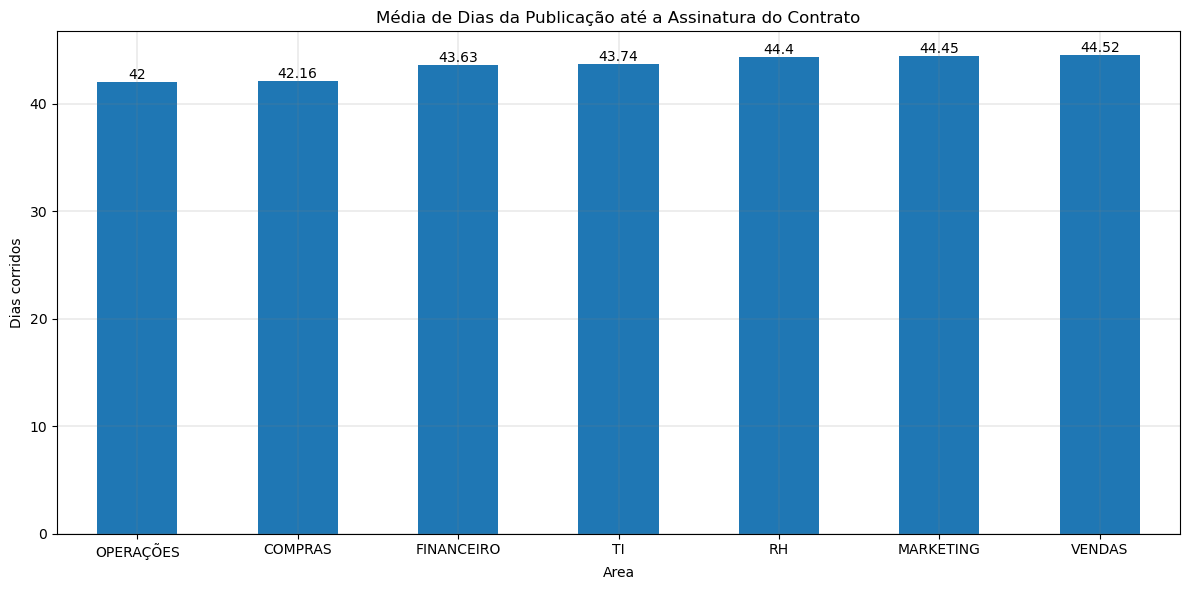

In [106]:
fig, ax = plt.subplots(figsize=(12,6))

#plota o gráfico de barras
df_eficiencia.plot(kind='bar', legend=False)

plt.title('Média de Dias da Publicação até a Assinatura do Contrato')
plt.xlabel("Area")
plt.ylabel("Dias corridos")

b1 = ax.bar_label(ax.containers[0])

# Função para deitar o nome do grafico
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

#Ajusta as margenes do gráfico ( para eliminar margnes desnecessárias)
plt.tight_layout()

#Exibir as linhas de grade

plt.grid(linewidth=0.2, color='gray')

#Salva o gráfico
plt.savefig("./media_dia..jpeg")


O setor de 'OPERAÇÕES' teve uma efiência melhor dentre os outros setores em relação a média de dias sobre a assinatura do contrato, onde obteve um desempenho de uma média de 44 dias em relação aos outro setores, seguido de compras com 42.16 dias e financeiro que ficou em terceiro lugar com uma media de 43.74 dias. Também é possível observar que o setor de vendas foi o setor menor desempenho, com uma média de 44.52 dias

In [50]:
#Verificando as areas que possuem no dataframe
df_base['AREA'].unique()

array(['OPERAÇÕES', 'VENDAS', 'FINANCEIRO', 'MARKETING', 'COMPRAS', 'RH',
       'TI'], dtype=object)

### 2.2 Pergunta 02

2- Qual é a média de saving obtido por projeto?
Saving  é o ato de economizar ou reduzir despesas.

Para obter esse insigths, praticamento as mesmas funções para responder a pergunta 01,
Porém com algumas modificações que na função do sort_values(ascending=False) que dessa vez
irei exibir de forma descrente.
E também utilizei a função .bar_label para exibir o valor em cima de cada barra 
no forma de real 


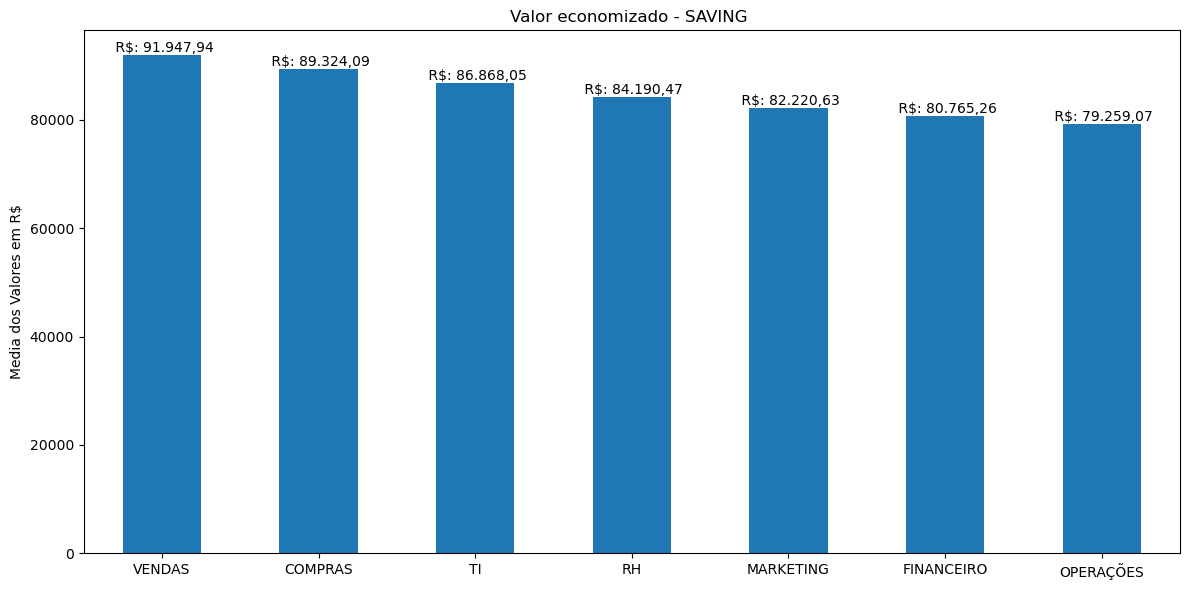

In [51]:
#2- Qual é a média de saving obtido por projeto?

df_media_saving = df_base.groupby('AREA')['SAVING'].mean().round(2).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12,6))

#plota o gráfico de barras
df_media_saving.plot(kind='bar', legend=False)

plt.title('Valor economizado - SAVING ')
plt.xlabel("")
plt.ylabel("Media dos Valores em R$")

#Acrescenta os valores sobre as barras
b1 = ax.bar_label(ax.containers[0],fmt=lambda x: f'{locale.format_string(" R$: %.2f", x, grouping=True)}')
#b1[-1].set_color("#ff9900")
# Função para deitar o nome do grafico
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

#Ajusta as margenes do gráfico ( para eliminar margnes desnecessárias)
plt.tight_layout()

#Salva o gráfico
plt.savefig("./media_saving.jpeg")


A setor de Vendas obtive a melhor econimizar entre os outro setores, conseguir economizar quase
 92 mil Reais nos projetos assinados, seguindo de compras e ti. O setor teve uma economia menor em vista dos outro setor, com uma eeconomiza aproximadamente de R$ 79 mil
 
 #Essa aqui responde as duas perguntas.

### 2.3 Pergunta 03 

3 - Qual a quantidade de projeto por area e quanto foi o gasto final ?

Nessa pergunta irei utilizar a função df_base['AREA'].value_counts() para agrupar os setores e fazer a contagem de projetos por area e logo em seguida calcular o valor médio final por projeto.

In [85]:
#4 - Qual a quantidade de projeto por area e quanto foi o gasto final ?

df_area = df_base['AREA'].value_counts().sort_values(ascending=True)

#Exibindo o dataframe
df_area

AREA
FINANCEIRO    57
COMPRAS       64
MARKETING     71
OPERAÇÕES     72
RH            73
TI            81
VENDAS        82
Name: count, dtype: int64

C:\Users\Arthur Lopes\AppData\Local\Temp\ipykernel_16240\846174395.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


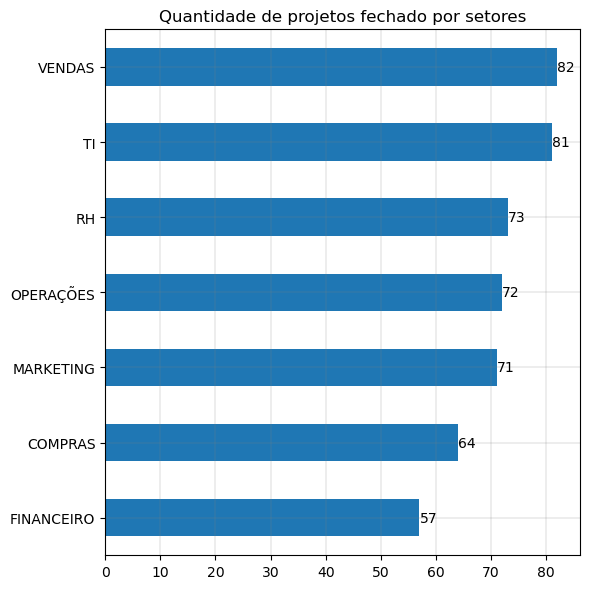

In [87]:
fig, ax = plt.subplots(figsize=(6,6))

#plota o gráfico de barras
df_area.plot(kind='barh', legend=False)

plt.title('Quantidade de projetos fechado por setores')
plt.xlabel("")
plt.ylabel("")

b1 = ax.bar_label(ax.containers[0])

# Função para deitar o nome do grafico
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

#Ajusta as margenes do gráfico ( para eliminar margnes desnecessárias)
plt.tight_layout()

#exibir as linhas de grade
plt.grid(linewidth=0.2, color='gray')

#Salva o gráfico
plt.savefig("./qdts_fechado_setor.jpeg")


In [54]:
#A media de valor final gasto por projeto (Area)

df_media_valor_area = df_base.groupby('AREA')['VALOR_FECHADO'].mean().round().sort_values(ascending=False)

#exibindo o dataframe

df_media_valor_area

AREA
COMPRAS       526926.0
MARKETING     502286.0
FINANCEIRO    492814.0
TI            485070.0
RH            481947.0
VENDAS        479101.0
OPERAÇÕES     466546.0
Name: VALOR_FECHADO, dtype: float64

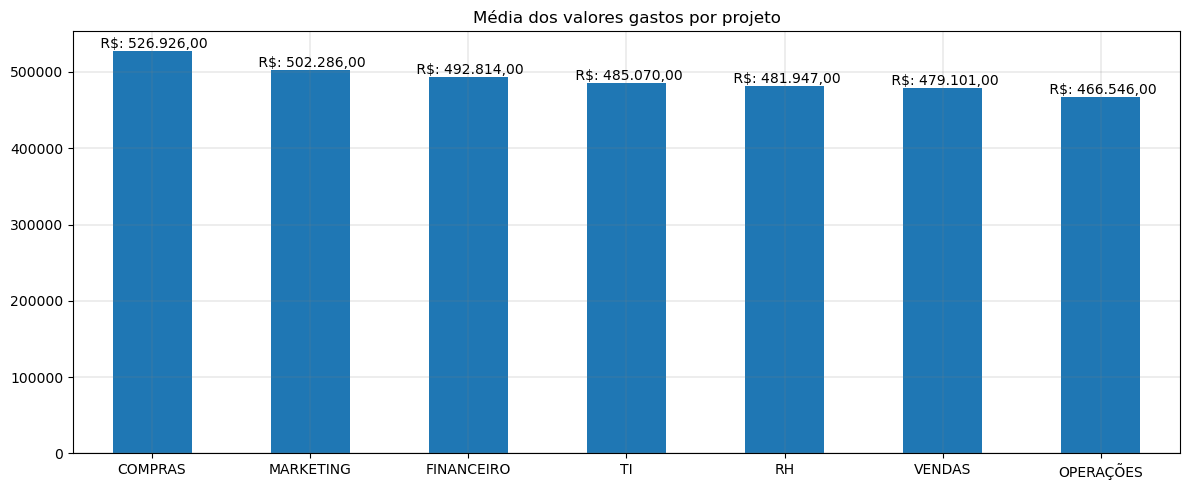

In [88]:
fig, ax = plt.subplots(figsize=(12,5))

#plota o gráfico de barras
df_media_valor_area.plot(kind='bar', legend=False)

plt.title('Média dos valores gastos por projeto')
plt.xlabel("")
plt.ylabel("")

b1 = ax.bar_label(ax.containers[0],fmt=lambda x: f'{locale.format_string(" R$: %.2f", x, grouping=True)}')

# Função para deitar o nome do grafico
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

#Ajusta as margenes do gráfico ( para eliminar margnes desnecessárias)
plt.tight_layout()

plt.grid(linewidth=0.2, color = 'gray')

#Salva o gráfico
plt.savefig("./media_valores_gastos.jpeg")


Analizando os dois grafico acima, somente reforça a qualidade do setor de comprar em economizar.Pois, mesmo sendo o setor que mais realizou projeto (81), obteve o menos gasto final entre os setores que teviram menor quantidade de projetos.

### 2.4 - Pergunta 04

4 - Media de gasto partindo do index da data de assinatura de contrato.( utilizando serie temporal)

Irei setar a coluna 'DATA_ASSINATURA_CONTRATO' com index para realizar
determinando a contagem de valor por mês

In [56]:
#clonando o dataframe
df_serie_temporal = df_base

#Transformando a data no index
df_serie_temporal.set_index('DATA_ASSINATURA_DE_CONTRATO', inplace=True)

#exibindo o dataframe

#df_serie_temporal = df_base['DATA_ASSINATURA_DE_CONTRATO'].set_index.resample('M').count().cumsum()
#df_entregas_line = df_pacotes_stemporal['ID_PEDIDO'].resample('D').count().cumsum()


In [57]:
#exibindo o dataframe com o index modificado
df_serie_temporal.head()


,CODIGO_DO_PROJETO,AREA,DATA_PUBLICACAO_AO_MERCADO,DATA_DE_AVALIACAO_TECNICA,DATA_AVALIACAO_COMERCIAL,DATA_PREMIACAO,BUDGET,VALOR_FECHADO,SAVING,PUBLICACAO_ATE_ASSINATURA
DATA_ASSINATURA_DE_CONTRATO,,,,,,,,,,
2023-11-02,PROJ_001,OPERAÇÕES,2023-09-28,2023-10-11,2023-10-17,2023-10-26,319000,302698,16302,35
2023-04-10,PROJ_002,VENDAS,2023-02-23,2023-03-18,2023-03-31,2023-04-05,369000,349984,19016,46
2023-05-23,PROJ_003,FINANCEIRO,2023-04-11,2023-04-24,2023-05-08,2023-05-22,731000,662422,68578,42
2023-11-07,PROJ_004,OPERAÇÕES,2023-09-21,2023-10-19,2023-10-25,2023-11-01,947000,892694,54306,47
2023-04-05,PROJ_005,MARKETING,2023-02-22,2023-03-12,2023-03-21,2023-03-31,499000,463269,35731,42


In [58]:
df_serie_temporal.columns

Index(['CODIGO_DO_PROJETO', 'AREA', 'DATA_PUBLICACAO_AO_MERCADO',
       'DATA_DE_AVALIACAO_TECNICA', 'DATA_AVALIACAO_COMERCIAL',
       'DATA_PREMIACAO', 'BUDGET', 'VALOR_FECHADO', 'SAVING',
       'PUBLICACAO_ATE_ASSINATURA'],
      dtype='object')

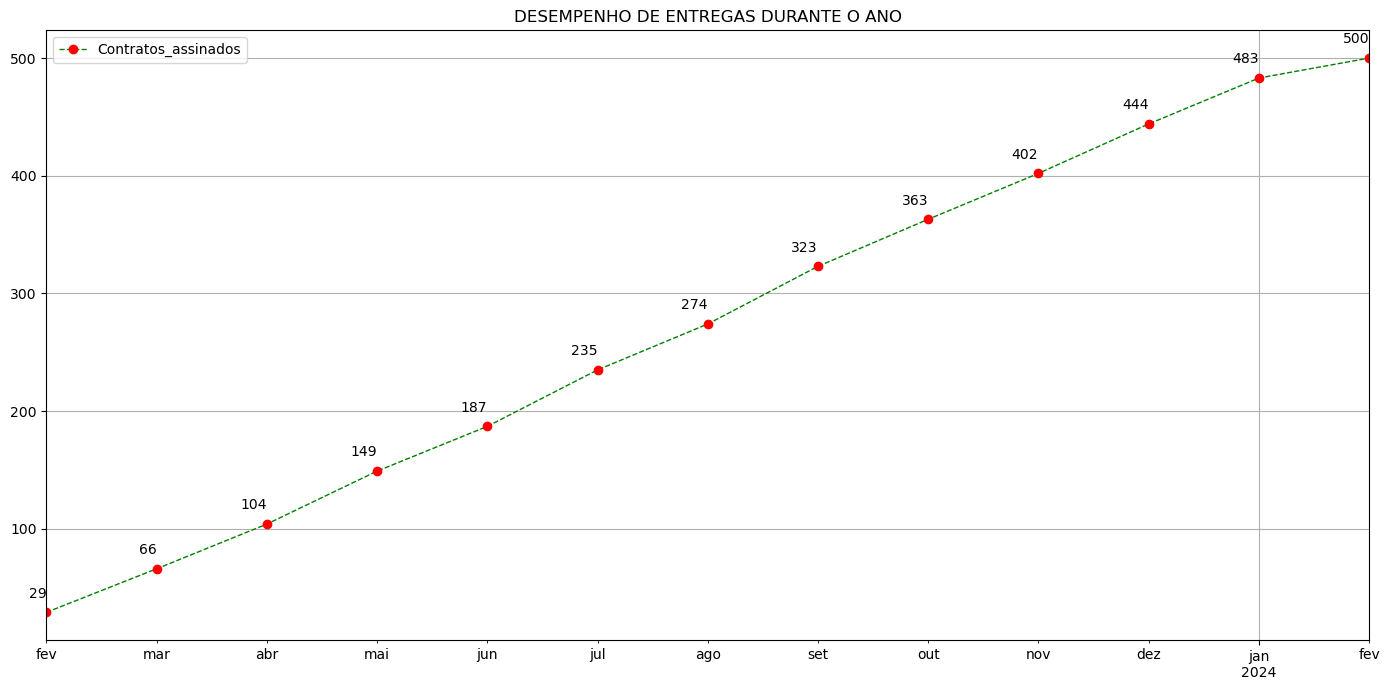

In [59]:
#plotando um grafico com o valor gasto por area ao decorrer dos meses

#Função .cumsum() faz a contagem com os valores acumulados, dia a dia
# A função .resample('D') utiliza a metrica de dias
#.plot() plota o grafico com as especificações:
#Kind='line' - Plota grafico de linhas
#label='' , especifica o nome da linha
#marker='' Criar pontos a cada marcação
#figsize = especifica o tamanho do grafico

df_valor_gasto_mes = df_serie_temporal['AREA'].resample('M').count().cumsum()

df_valor_gasto_mes.plot(kind='line',
                      label='Contratos_assinados',
                      marker='o',
                      color='green',
                      linewidth='1',
                      linestyle='--',
                      mfc='red',
                      mec='red',figsize=(14,7))

#Adicionando rotulo aos valores
for x, y in df_valor_gasto_mes.items():
    plt.text(x,y + 10,f'{y}',ha='right',va='bottom')
    
# Adicionando rótulo aos valores com separadores de milhares no eixo y
    
formatter = ticker.StrMethodFormatter('{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
    
#Ajustando os ticks do eixo X

#plt.xticks(range(len(df_entregas_line)), df_entregas_line.index)
                                
plt.title('DESEMPENHO DE ENTREGAS DURANTE O ANO')
plt.xlabel('')
#plt.ylabel('QUANTIDADES DE ENCOMENDAS')
plt.legend()

# Definindo o formato dos números nos eixos y com apenas duas casas decimais
#ax.ticklabel_format(style='plain', axis='y', useOffset=False)
#ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '%1.2f' % x))

#plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.1f}'.format(x)))

#Exibir as linhas de grade
plt.grid()

#Reduzir a margem 
plt.tight_layout()

#salvando a imagem
plt.savefig("./desempenho_ano.jpeg")


Com o grafico temporal dos meses, é possível observar que no período de 1 ano ( tendo o inicio em Fevereiro) foi possível obter 500 assinatura de contrato. 

In [60]:
#Exibindo os meses agrupando
#df_base['MES_ASSINATURA'].value_counts()

#resetando o index 
df_base.reset_index(inplace=True)

#exibindo o dataframe
df_base.head()

,DATA_ASSINATURA_DE_CONTRATO,CODIGO_DO_PROJETO,AREA,DATA_PUBLICACAO_AO_MERCADO,DATA_DE_AVALIACAO_TECNICA,DATA_AVALIACAO_COMERCIAL,DATA_PREMIACAO,BUDGET,VALOR_FECHADO,SAVING,PUBLICACAO_ATE_ASSINATURA
0,2023-11-02,PROJ_001,OPERAÇÕES,2023-09-28,2023-10-11,2023-10-17,2023-10-26,319000,302698,16302,35
1,2023-04-10,PROJ_002,VENDAS,2023-02-23,2023-03-18,2023-03-31,2023-04-05,369000,349984,19016,46
2,2023-05-23,PROJ_003,FINANCEIRO,2023-04-11,2023-04-24,2023-05-08,2023-05-22,731000,662422,68578,42
3,2023-11-07,PROJ_004,OPERAÇÕES,2023-09-21,2023-10-19,2023-10-25,2023-11-01,947000,892694,54306,47
4,2023-04-05,PROJ_005,MARKETING,2023-02-22,2023-03-12,2023-03-21,2023-03-31,499000,463269,35731,42


In [61]:
#Extraindo o mês da coluna  'DATA_ASSINATURA_DE_CONTRATO'

df_base['MES_ASSINATURA'] = df_base['DATA_ASSINATURA_DE_CONTRATO'].dt.month

#exibindo o dataframe com a nova coluna
df_base.head()

,DATA_ASSINATURA_DE_CONTRATO,CODIGO_DO_PROJETO,AREA,DATA_PUBLICACAO_AO_MERCADO,DATA_DE_AVALIACAO_TECNICA,DATA_AVALIACAO_COMERCIAL,DATA_PREMIACAO,BUDGET,VALOR_FECHADO,SAVING,PUBLICACAO_ATE_ASSINATURA,MES_ASSINATURA
0,2023-11-02,PROJ_001,OPERAÇÕES,2023-09-28,2023-10-11,2023-10-17,2023-10-26,319000,302698,16302,35,11
1,2023-04-10,PROJ_002,VENDAS,2023-02-23,2023-03-18,2023-03-31,2023-04-05,369000,349984,19016,46,4
2,2023-05-23,PROJ_003,FINANCEIRO,2023-04-11,2023-04-24,2023-05-08,2023-05-22,731000,662422,68578,42,5
3,2023-11-07,PROJ_004,OPERAÇÕES,2023-09-21,2023-10-19,2023-10-25,2023-11-01,947000,892694,54306,47,11
4,2023-04-05,PROJ_005,MARKETING,2023-02-22,2023-03-12,2023-03-21,2023-03-31,499000,463269,35731,42,4


In [73]:
#Exibindo a contagem de projetos assinados por mes

df_meses = df_base['MES_ASSINATURA'].value_counts()

#exibindo o dataframe
df_meses

MES_ASSINATURA
9     49
7     48
2     46
5     45
12    42
10    40
11    39
8     39
1     39
4     38
6     38
3     37
Name: count, dtype: int64

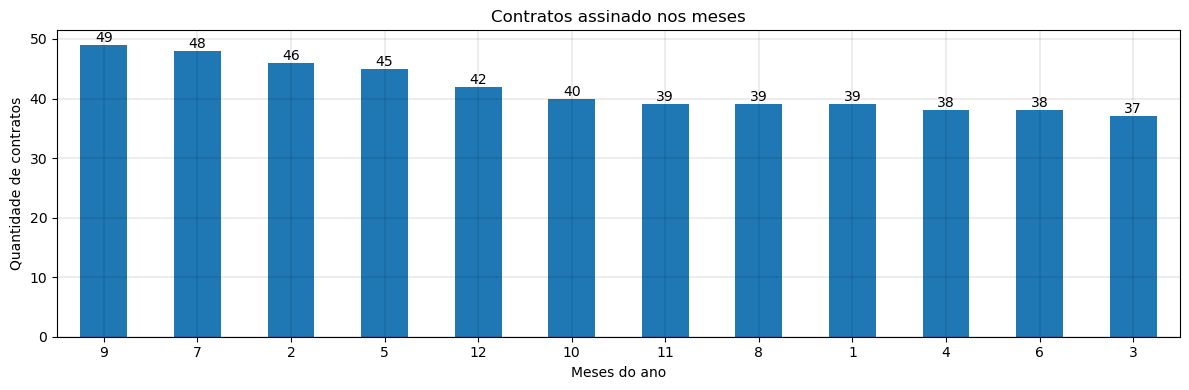

In [80]:
#Grafico do mês de setembro
fig, ax = plt.subplots(figsize=(12,4))

#plota o gráfico de barras
df_meses.plot(kind='bar', legend=False)

plt.title('Contratos assinado nos meses')
plt.xlabel("Meses do ano")
plt.ylabel("Quantidade de contratos")

#b1 = ax.bar_label(ax.containers[0])

# Função para deitar o nome do grafico
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

b1 = ax.bar_label(ax.containers[0])

#Ajusta as margenes do gráfico ( para eliminar margnes desnecessárias)
plt.tight_layout()

#exibindo linha de grade
plt.grid(linewidth=0.1, color='black')

#salvando a imagem
plt.savefig('./meses_anos.jpeg')

O Mês de setembro foi que teve o maior numero de assinaturas de contrato no ano.

In [63]:
#Filtando somente os contratos com oo mês 9
df_mes_setembro = df_base[df_base['MES_ASSINATURA'] == 9]

#Agrupando qual area teve o maior fechamento

df_area_mes_setembro = df_mes_setembro['AREA'].value_counts().sort_values(ascending=False)

#exibindo
df_area_mes_setembro

AREA
VENDAS        15
MARKETING      9
FINANCEIRO     7
TI             6
COMPRAS        5
OPERAÇÕES      4
RH             3
Name: count, dtype: int64

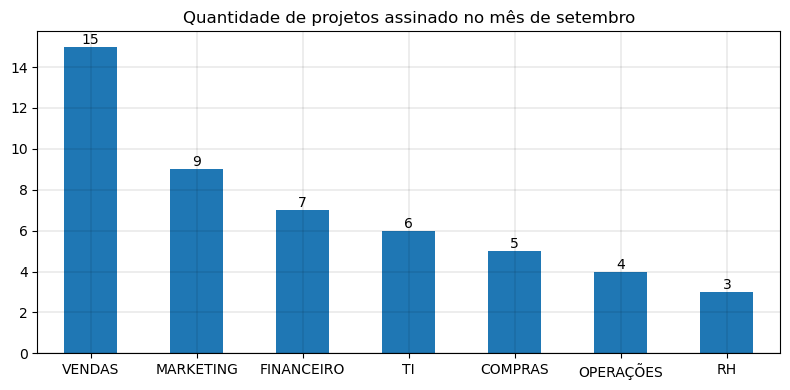

In [72]:
#Grafico do mês de setembro
fig, ax = plt.subplots(figsize=(8,4))

#plota o gráfico de barras
df_area_mes_setembro.plot(kind='bar', legend=False)

plt.title('Quantidade de projetos assinado no mês de setembro')
plt.xlabel("")
plt.ylabel("")

#b1 = ax.bar_label(ax.containers[0])

# Função para deitar o nome do grafico
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

b1 = ax.bar_label(ax.containers[0])

#Ajusta as margenes do gráfico ( para eliminar margnes desnecessárias)
plt.tight_layout()

#exibindo linha de grade
plt.grid(linewidth=0.1, color='black')

#salvando a imagem
plt.savefig('./qts_setembro.jpeg')

é possível observar que o setor de Vendas continua com um bom desempenho e o mesmo teve o melhor desempenho entre os outros setores no mês de setembro, onde foi o mês com o maior numero de contratos assinados.

In [65]:
df_base.head(4)

,DATA_ASSINATURA_DE_CONTRATO,CODIGO_DO_PROJETO,AREA,DATA_PUBLICACAO_AO_MERCADO,DATA_DE_AVALIACAO_TECNICA,DATA_AVALIACAO_COMERCIAL,DATA_PREMIACAO,BUDGET,VALOR_FECHADO,SAVING,PUBLICACAO_ATE_ASSINATURA,MES_ASSINATURA
0,2023-11-02,PROJ_001,OPERAÇÕES,2023-09-28,2023-10-11,2023-10-17,2023-10-26,319000,302698,16302,35,11
1,2023-04-10,PROJ_002,VENDAS,2023-02-23,2023-03-18,2023-03-31,2023-04-05,369000,349984,19016,46,4
2,2023-05-23,PROJ_003,FINANCEIRO,2023-04-11,2023-04-24,2023-05-08,2023-05-22,731000,662422,68578,42,5
3,2023-11-07,PROJ_004,OPERAÇÕES,2023-09-21,2023-10-19,2023-10-25,2023-11-01,947000,892694,54306,47,11


In [66]:
#extraindo somente o mês da coluna DATA_PUBLICACAO_AO_MERCADO
df_base['MES_PUBLICACAO'] = df_base['DATA_PUBLICACAO_AO_MERCADO'].dt.month

#exibindo o dataframe
df_base.head(2)


,DATA_ASSINATURA_DE_CONTRATO,CODIGO_DO_PROJETO,AREA,DATA_PUBLICACAO_AO_MERCADO,DATA_DE_AVALIACAO_TECNICA,DATA_AVALIACAO_COMERCIAL,DATA_PREMIACAO,BUDGET,VALOR_FECHADO,SAVING,PUBLICACAO_ATE_ASSINATURA,MES_ASSINATURA,MES_PUBLICACAO
0,2023-11-02,PROJ_001,OPERAÇÕES,2023-09-28,2023-10-11,2023-10-17,2023-10-26,319000,302698,16302,35,11,9
1,2023-04-10,PROJ_002,VENDAS,2023-02-23,2023-03-18,2023-03-31,2023-04-05,369000,349984,19016,46,4,2


In [67]:
#exibindo a quantidade de 
df_base['MES_PUBLICACAO'].value_counts().sort_values(ascending=True)

MES_PUBLICACAO
11    30
3     35
10    37
7     38
6     40
1     42
2     44
4     44
9     45
5     45
12    46
8     54
Name: count, dtype: int64

O mês 8 (Agosto) foi o mês que mais houve publicacao de projetos

Nessa caso acima temos o mês 7 como o mês que mais realizou assinatura.

In [68]:
#Entender quantos dias entre a data da premiação e a assinatura do contrato
#Qual setor faz isso mais rapido

df_base['PREMIACAO_ATE_ASSINATURA'] = (df_base['DATA_ASSINATURA_DE_CONTRATO'] - df_base['DATA_PREMIACAO']).dt.days

#exibindo o dataframe com a nova coluna

df_base.head()

,DATA_ASSINATURA_DE_CONTRATO,CODIGO_DO_PROJETO,AREA,DATA_PUBLICACAO_AO_MERCADO,DATA_DE_AVALIACAO_TECNICA,DATA_AVALIACAO_COMERCIAL,DATA_PREMIACAO,BUDGET,VALOR_FECHADO,SAVING,PUBLICACAO_ATE_ASSINATURA,MES_ASSINATURA,MES_PUBLICACAO,PREMIACAO_ATE_ASSINATURA
0,2023-11-02,PROJ_001,OPERAÇÕES,2023-09-28,2023-10-11,2023-10-17,2023-10-26,319000,302698,16302,35,11,9,7
1,2023-04-10,PROJ_002,VENDAS,2023-02-23,2023-03-18,2023-03-31,2023-04-05,369000,349984,19016,46,4,2,5
2,2023-05-23,PROJ_003,FINANCEIRO,2023-04-11,2023-04-24,2023-05-08,2023-05-22,731000,662422,68578,42,5,4,1
3,2023-11-07,PROJ_004,OPERAÇÕES,2023-09-21,2023-10-19,2023-10-25,2023-11-01,947000,892694,54306,47,11,9,6
4,2023-04-05,PROJ_005,MARKETING,2023-02-22,2023-03-12,2023-03-21,2023-03-31,499000,463269,35731,42,4,2,5


In [100]:
df_premiacao_assinatura = df_base['PREMIACAO_ATE_ASSINATURA'].value_counts()

#Exibindo o dataframe
df_premiacao_assinatura.head()

PREMIACAO_ATE_ASSINATURA
4    65
5    63
6    57
3    56
7    55
Name: count, dtype: int64

C:\Users\Arthur Lopes\AppData\Local\Temp\ipykernel_16240\2301094325.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


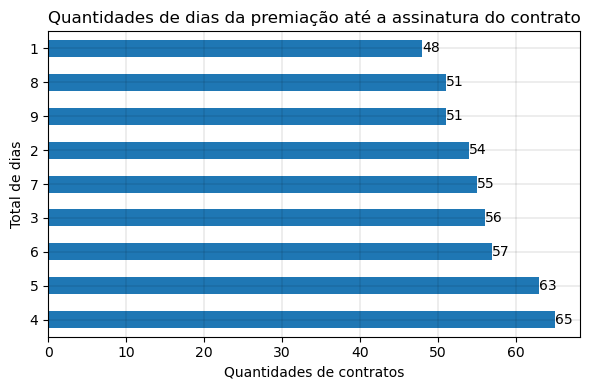

In [104]:
#plotar grafico em relação a quantidade de dia da premiaçao até a assinatura

#Grafico do mês de setembro
fig, ax = plt.subplots(figsize=(6,4))

#plota o gráfico de barras
df_premiacao_assinatura.plot(kind='barh', legend=False)

plt.title('Quantidades de dias da premiação até a assinatura do contrato')
plt.xlabel("Quantidades de contratos")
plt.ylabel("Total de dias")

#b1 = ax.bar_label(ax.containers[0])

# Função para deitar o nome do grafico
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

b1 = ax.bar_label(ax.containers[0])

#Ajusta as margenes do gráfico ( para eliminar margnes desnecessárias)
plt.tight_layout()

#exibindo linha de grade
plt.grid(linewidth=0.1, color='black')

#salvando a imagem
plt.savefig('./premiacao_assinatura.jpeg')

Acima é possível vê que após  a data de premiação, demora no maximo 9 dia para realizar a assinatura do contrato
Em contra partida, tivemos 158 contrato assinado com a duração de 3 dias da data da premiação

In [ ]:
#Exportando o dataframe para csv